<ipython-input-43-795c4c19f0f7>:41: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Xset=new_dynmaic.groupby('stay_id').mean()


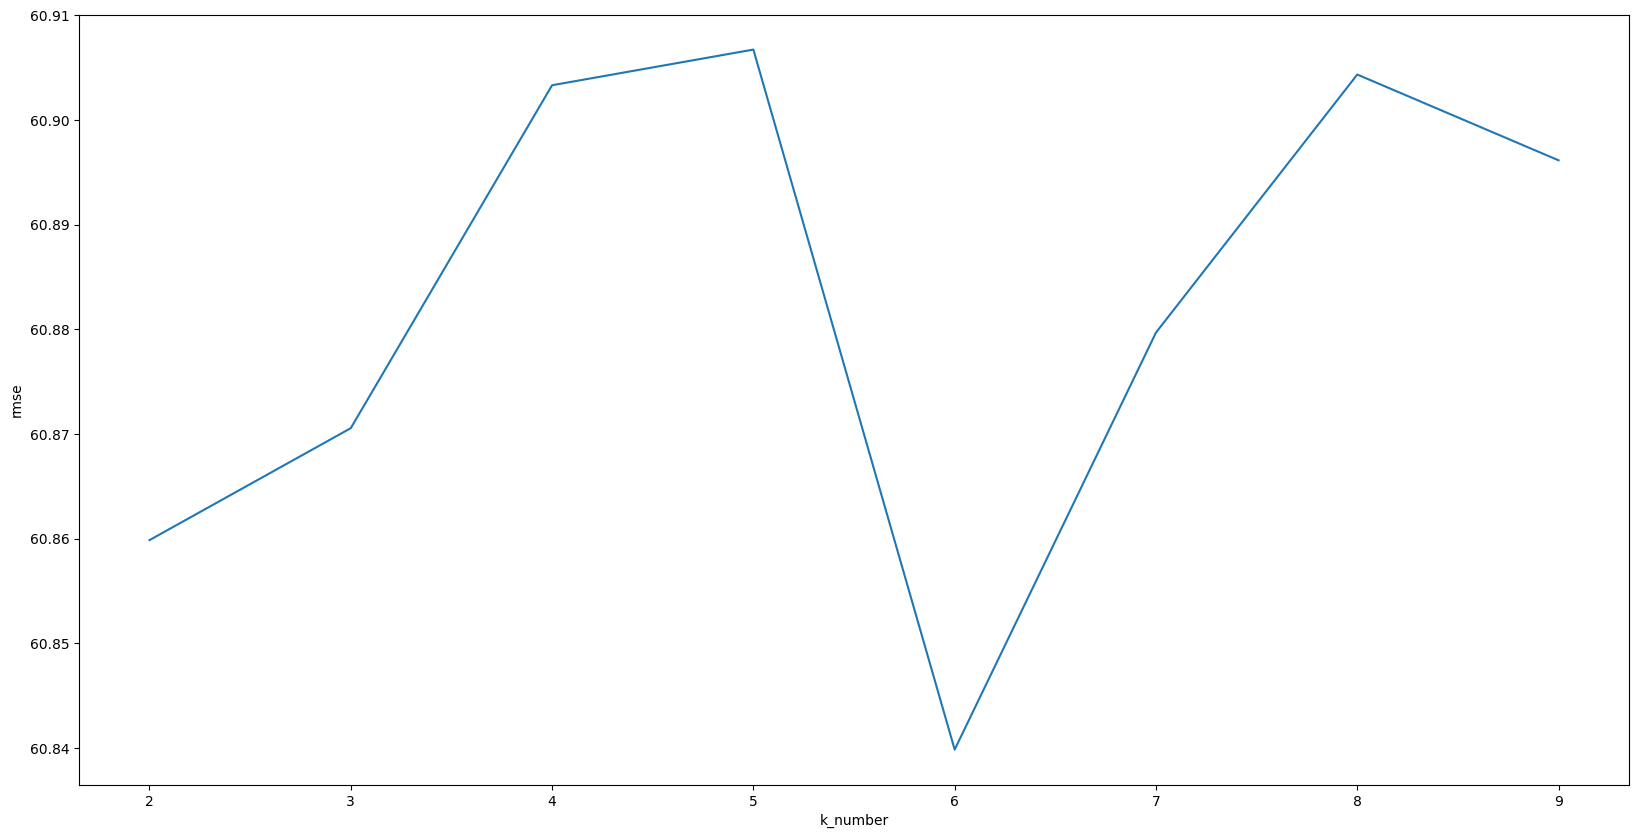

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing

from sklearn.metrics import roc_auc_score

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import matplotlib.pyplot as plt  

#load data
X = pd.read_csv('/content/sph_dynamic.csv')
Y=pd.read_csv(r"/content/sph_static.csv")
'''
X.head()
len(X)
X.isna().sum()
'''
drop_column = ['total_protein','heart_rate','sbp','dbp','mbp','resp_rate','temperature','bilirubin_direct','bilirubin_indirect',
              'ph','lactate','urineoutput','sofa_respiration','sofa_coagulation','sofa_liver','sofa_cardiovascular','sofa_cns',
              'sofa_renal']
drop_column1=['icu_intime','vent_start','vent_end']
new_dynmaic = X.drop(columns = drop_column)
new_dynmaic.head()


#data merge
Xset=new_dynmaic.groupby('stay_id').mean()
Yset=Y.drop(columns=drop_column1)
data0=pd.merge(Xset,Yset,on='stay_id')

#difinite features and target
target=pd.DataFrame(data0['vent_duration'])
features=data0.drop(columns=['vent_duration','stay_id'])
from sklearn import metrics



def optimize_k(data, target):
    errors = []
    k_number=[]
    rmse=[]
    plt.figure(figsize=(20, 10), dpi=100)
    for k in range(2, 10, 1):
        imputer = KNNImputer(n_neighbors=k, weights='uniform', metric='nan_euclidean')
        imputed = imputer.fit_transform(features)
        features_imputed = pd.DataFrame(imputed, columns=features.columns)
        
        X_train, X_test, y_train, y_test = train_test_split(features_imputed, target, test_size=0.2, random_state=3)
        X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size=0.2, random_state=6)
        model = LinearRegression()
        model.fit(X_train1, y_train1)
        y_pred = model.predict(X_test1)
        error = np.sqrt(metrics.mean_squared_error(y_test1, y_pred))
        errors.append({'k': k, 'rmse': error})
        k_number.append(k)
        rmse.append(error)
    plt.plot(k_number,rmse)
    plt.xlabel("k_number") 
 
    plt.ylabel("rmse") 
    plt.show()
    return errors


k_errors = optimize_k(data=features, target=target)




#impute
Xc=features.columns

imputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')
features=pd.DataFrame(imputer.fit_transform(features))
#features= pd.DataFrame(KNN(k=6).fit_transform(features)) 
features.columns=Xc

#split dataset
trainX, testX, trainY, testY = train_test_split(features, target, random_state=3, test_size=0.2)


#build up the model
models = {
    "linear":LinearRegression(),
    "dtr": DecisionTreeRegressor(),
    "rfr": RandomForestRegressor(),
    "svr": SVR(),
    "xgbr": xgb.XGBRegressor()
}

